In [70]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import necessary libraries
import pandas as pd

# Step 3: Define the path to your data file
file_path = '/content/drive/MyDrive/Colab_Notebooks/Crypto-till-today.csv'

# Step 4: Load the data into a pandas DataFrame
data = pd.read_csv(file_path)

# Step 5: Display the first few rows of the DataFrame
data.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Time,"BTC / Price, USD","ETH / Price, USD","BNB / Price, USD"
0,18/07/2010,0.085840,NaN,NaN
1,19/07/2010,0.080800,NaN,NaN
2,20/07/2010,0.074736,NaN,NaN
3,21/07/2010,0.079193,NaN,NaN
4,22/07/2010,0.058470,NaN,NaN


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5074 entries, 0 to 5073
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              5074 non-null   object 
 1   BTC / Price, USD  5074 non-null   float64
 2   ETH / Price, USD  3227 non-null   float64
 3   BNB / Price, USD  2520 non-null   float64
dtypes: float64(3), object(1)
memory usage: 158.7+ KB


In [72]:
data.describe()

,"BTC / Price, USD","ETH / Price, USD","BNB / Price, USD"
count,5074.000000,3227.000000,2520.000000
mean,11634.709916,1030.690084,178.441023
std,17152.369998,1167.696700,188.017461
min,0.050541,0.420000,0.074807
25%,230.198976,139.756795,14.838844
50%,2544.997492,384.507250,37.221845
75%,16878.328118,1799.745865,309.559363
max,73081.575910,4811.156463,710.120691


In [73]:
data.shape

(5074, 4)

In [74]:
is_null = data.isnull().sum()

In [75]:
is_null

Time                   0
BTC / Price, USD       0
ETH / Price, USD    1847
BNB / Price, USD    2554
dtype: int64

In [76]:
# prompt: create a new column that generates week days with reference to date

import datetime

data['Weekday'] = data['Time'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y').strftime('%A'))


In [77]:
data['Month'] = data['Time'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y').strftime('%B'))

In [78]:
data['Year'] = data['Time'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y').strftime('%Y'))

In [69]:
data

,Time,"BTC / Price, USD","ETH / Price, USD","BNB / Price, USD",Weekday,Month,Price_change,Year
0,18/07/2010,0.085840,NaN,NaN,Sunday,July,NaN,2010
1,19/07/2010,0.080800,NaN,NaN,Monday,July,-0.058714,2010
2,20/07/2010,0.074736,NaN,NaN,Tuesday,July,-0.075053,2010
3,21/07/2010,0.079193,NaN,NaN,Wednesday,July,0.059639,2010
4,22/07/2010,0.058470,NaN,NaN,Thursday,July,-0.261679,2010
...,...,...,...,...,...,...,...,...
5069,03/06/2024,68833.302840,3767.485638,627.031543,Monday,June,0.015158,2024
5070,04/06/2024,70554.089430,3812.189251,684.203051,Tuesday,June,0.024999,2024
5071,05/06/2024,71087.443320,3863.331805,698.223090,Wednesday,June,0.007560,2024
5072,06/06/2024,70788.501380,3811.857642,710.120691,Thursday,June,-0.004205,2024


In [79]:
import matplotlib.pyplot as plt

<ipython-input-80-e0a3b269d1da>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  plt.plot(pd.to_datetime(data['Time']), data['BTC / Price, USD'])


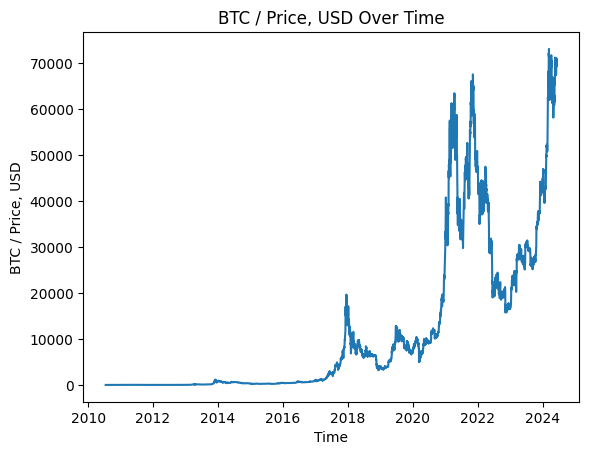

In [80]:
plt.plot(pd.to_datetime(data['Time']), data['BTC / Price, USD'])
plt.xlabel('Time')
plt.ylabel('BTC / Price, USD')
plt.title('BTC / Price, USD Over Time')
plt.show()

In [81]:
# prompt: create a new column which is measure of change with respect to previous day

data['Price_change'] = (data['BTC / Price, USD'] - data['BTC / Price, USD'].shift(1)) / data['BTC / Price, USD'].shift(1)
data.head()


,Time,"BTC / Price, USD","ETH / Price, USD","BNB / Price, USD",Weekday,Month,Year,Price_change
0,18/07/2010,0.085840,NaN,NaN,Sunday,July,2010,NaN
1,19/07/2010,0.080800,NaN,NaN,Monday,July,2010,-0.058714
2,20/07/2010,0.074736,NaN,NaN,Tuesday,July,2010,-0.075053
3,21/07/2010,0.079193,NaN,NaN,Wednesday,July,2010,0.059639
4,22/07/2010,0.058470,NaN,NaN,Thursday,July,2010,-0.261679
